In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402

import utils

In [4]:
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

In [14]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim" #"Berlin-Center" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])

In [19]:
block_centroids = True
r_gap = 1e-5

In [20]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=block_centroids, rgap=r_gap)

bush-based parallel Assignment STATS
 Initialised data structures, num nodes = 416, num links = 914
 0th iteration done, cost = 1296185.75
Iteration 1, computed gap: 0.004539900226943727, computed objective: 1291063.0, stepsize: 0.3639256612373998
Iteration 2, computed gap: 0.004076406980663139, computed objective: 1290323.25, stepsize: 0.22731330551893153
Iteration 3, computed gap: 0.0027829722638348375, computed objective: 1290238.75, stepsize: 0.21653805330208006
Iteration 4, computed gap: 0.0019026463166040841, computed objective: 1290184.875, stepsize: 0.34174530222797084
Iteration 5, computed gap: 0.0012160353756275333, computed objective: 1290168.0, stepsize: 0.3198312615670417
Iteration 6, computed gap: 0.0007710481017328963, computed objective: 1290151.75, stepsize: 0.44777249947191017
Iteration 7, computed gap: 0.0005577956898813463, computed objective: 1290147.625, stepsize: 0.16160726523964458
Iteration 8, computed gap: 0.0004997441015611725, computed objective: 1290146.0, 

In [21]:
%%time
bfw_rgap = r_gap #1e-5
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=bfw_rgap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.01813536336911382,0.25610159320627757
# Alert: Adding 0.3333333333333333 to stepsize to make it non-zero
3,0.0036265961074987314,0.3333333333333333
# Alert: Adding 0.25 to stepsize to make it non-zero
4,0.002300502121447229,0.25
# Alert: Adding 0.2 to stepsize to make it non-zero
5,0.0016660925434687926,0.2
# Alert: Adding 0.16666666666666666 to stepsize to make it non-zero
6,0.0013674148395812515,0.16666666666666666
# Alert: Adding 0.14285714285714285 to stepsize to make it non-zero
7,0.001152166503599817,0.14285714285714285
# Alert: Adding 0.125 to stepsize to make it non-zero
8,0.0009970861455201863,0.125
# Alert: Adding 0.1111111111111111 to stepsize to make it non-zero
9,0.0008651833121821925,0.1111111111111111
# Alert: Adding 0.1 to stepsize to make it non-zero
10,0.0007703386571853957,0.1
# Alert: Adding 0.09090909090909091 to stepsize to make it non-zero
11,0.0007020823903876606,0.09090909090909091
# Alert: Add

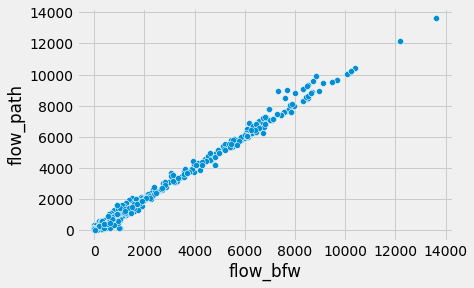

max diff in flow = 1590.601
max rel diff in flow = 111617.446%


,a_node,b_node,flow_bfw,flow_path,abs_change,rel_change
202,132,131,7331.132200,8921.733398,1590.601198,0.216965
201,131,130,7668.129373,8998.057617,1329.928244,0.173436
296,197,196,8855.358444,9930.183594,1074.825150,0.121376
297,198,197,8855.358444,9930.183594,1074.825150,0.121376
300,200,199,8725.755597,9598.928711,873.173114,0.100068
203,132,314,987.055452,125.839600,861.215852,0.872510
562,314,313,987.055452,125.839600,861.215852,0.872510
194,126,125,7618.290543,8477.782227,859.491684,0.112819
560,313,325,1024.955586,167.477859,857.477727,0.836600
208,136,135,8499.694989,9322.898438,823.203448,0.096851


In [22]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');

#full_result = full_result.merge(best_sol, on=['a_node', 'b_node'], how='outer')
#sns.scatterplot(data=full_result, x='flow_best', y='flow_path');

plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))
#display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'flow_best', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))